In [39]:
import pandas as pd
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [48]:
stk_data = yf.Ticker("SPY")
print(stk_data.ticker)
df_data = stk_data.history(period='10y')

df_data['Week'] = df_data.index.isocalendar().week
df_data['Day'] = df_data.index.isocalendar().day

df_data['PrevDayChng'] = df_data['Close'].pct_change(periods=1).shift(1).fillna(0)
df_data['Var'] = df_data.Close.rolling(5).var()
df_data['Var'] = df_data['Var'].fillna(df_data['Var'].mean())

df_data['EMA5'] = df_data.Close.ewm(span=5, adjust=False).mean()
df_data['EMA12'] = df_data.Close.ewm(span=12, adjust=False).mean()
df_data['EMA26'] = df_data.Close.ewm(span=26, adjust=False).mean()
df_data['MACD'] = df_data.EMA12-df_data.EMA26
df_data['Signal'] = df_data.MACD.ewm(span=9, adjust=False).mean()

# % Change in 2 weeks
df_data['Short_Gain'] = df_data.Close.pct_change(10).shift(-10)
df_data['Short_Gain'] = df_data['Short_Gain'].fillna(df_data['Short_Gain'].mean())

# % change in 3 months
df_data['Long_Gain'] = df_data.Close.pct_change(60).shift(-60)
df_data['Long_Gain'] = df_data['Long_Gain'].fillna(df_data['Long_Gain'].mean())

df_data

SPY


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,Var,EMA5,EMA12,EMA26,MACD,Signal,Short_Gain,Long_Gain
Date,,,,,,,,,,,,,,,,,,
2011-08-18,95.735754,98.373622,93.180061,94.100441,512956300,0.0,0,33,4,0.000000,5.590071,94.100441,94.100441,94.100441,0.000000,0.000000,0.056152,0.111827
2011-08-19,92.826686,95.226241,92.448674,92.563721,428281300,0.0,0,33,5,0.000000,5.590071,93.588201,93.864022,93.986610,-0.122587,-0.024517,0.046254,0.119576
2011-08-22,94.642816,94.692126,92.374746,92.637711,275090600,0.0,0,34,1,-0.016331,5.590071,93.271371,93.675359,93.886691,-0.211332,-0.061880,0.037789,0.124211
2011-08-23,92.982843,95.793282,92.514437,95.686455,331136600,0.0,0,34,2,0.000799,5.590071,94.076399,93.984758,94.020007,-0.035249,-0.056554,0.033064,0.071126
2011-08-24,95.481004,97.165621,95.259124,97.034142,246869700,0.0,0,34,3,0.032910,3.790222,95.062313,94.453894,94.243276,0.210618,-0.003120,0.008130,0.039480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11,443.820007,443.880005,442.619995,443.779999,44034300,0.0,0,32,3,0.001244,0.583064,442.429854,440.609756,437.098548,3.511208,3.489570,0.006539,0.038505
2021-08-12,443.619995,445.260010,442.660004,445.109985,38909400,0.0,0,32,4,0.002485,1.474159,443.323231,441.302099,437.691988,3.610111,3.513678,0.006539,0.038505
2021-08-13,445.589996,445.940002,445.070007,445.920013,39388300,0.0,0,32,5,0.002997,2.544335,444.188825,442.012547,438.301471,3.711076,3.553158,0.006539,0.038505


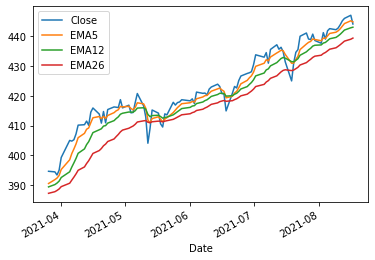

In [41]:
df_data.Close[-100:].plot()
df_data.EMA5[-100:].plot()
df_data.EMA12[-100:].plot()
df_data.EMA26[-100:].plot()
plt.legend()

In [50]:
price_scaler = MinMaxScaler()
df_data_scaled = df_data
df_data_scaled[['Close']] = price_scaler.fit_transform(df_data_scaled[['Close']])
for c in ['Open', 'High', 'Low']:
    df_data_scaled[[c]] = price_scaler.transform(df_data_scaled[[c]])

indicator_cols =['Volume', 'Week', 'Day', 'PrevDayChng', 'MACD', 'Signal', 'EMA5', 'EMA12', 'EMA26', 'Var']
indicator_scaler = MinMaxScaler()
df_data_scaled[indicator_cols] = indicator_scaler.fit_transform(df_data_scaled[indicator_cols])
df_data_scaled.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,Var,EMA5,EMA12,EMA26,MACD,Signal,Short_Gain,Long_Gain
Date,,,,,,,,,,,,,,,,,,
2011-08-18,95.735754,98.373622,93.180061,0.009255,512956300,0.0,0,0.615385,0.75,0.547045,0.014992,0.002356,0.001217,0.000619,0.717638,0.716671,0.056152,0.111827
2011-08-19,92.826686,95.226241,92.448674,0.004940,428281300,0.0,0,0.615385,1.00,0.547045,0.014992,0.000900,0.000540,0.000289,0.713814,0.715758,0.046254,0.119576
2011-08-22,94.642816,94.692126,92.374746,0.005148,275090600,0.0,0,0.634615,0.00,0.465403,0.014992,0.000000,0.000000,0.000000,0.711045,0.714367,0.037789,0.124211
2011-08-23,92.982843,95.793282,92.514437,0.013708,331136600,0.0,0,0.634615,0.25,0.551041,0.014992,0.002288,0.000886,0.000386,0.716538,0.714566,0.033064,0.071126
2011-08-24,95.481004,97.165621,95.259124,0.017492,246869700,0.0,0,0.634615,0.50,0.711575,0.010164,0.005090,0.002229,0.001032,0.724208,0.716555,0.008130,0.039480


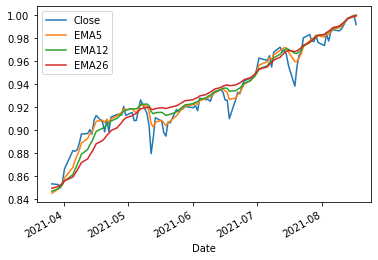

In [51]:
prices_sc = df_data_scaled.Close[-100:]
prices_sc.plot()
df_data_scaled.EMA5[-100:].plot()
df_data_scaled.EMA12[-100:].plot()
df_data_scaled.EMA26[-100:].plot()
plt.legend()

In [52]:
df_data_scaled.to_csv('scaled_data.csv')